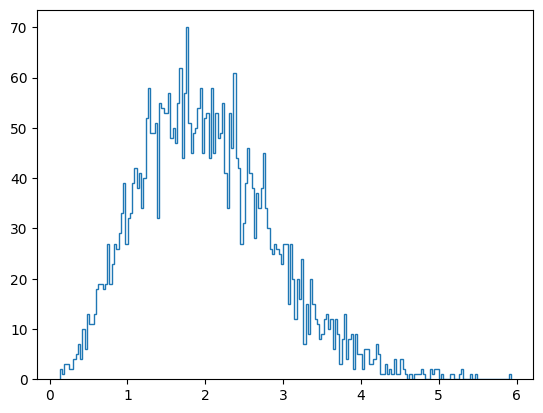

In [43]:
import numpy as np
import matplotlib.pyplot as plt

read = 0
v = np.array([0,0,0])
v_arr = []

with open("dumpfile.txt", "r") as d:
    for line in d:
        if read == 11:
            s = line.split()
            v = s[5:8]
            v_arr.append(np.linalg.norm(v))
            continue
        if line == "ITEM: ATOMS id type x y z vx vy vz\n":
            read += 1

counts, bins = np.histogram(v_arr, bins = 200, density = False)
# plt.hist(np.array(v_arr), bins=200)
# plt.scatter(bins, counts)
fig = plt.figure()
hist = fig.add_subplot(1,1,1)
maxwell = fig.add_subplot(1,1,1)
plt.stairs(counts, bins)
plt.show()

In [45]:
from scipy.optimize import curve_fit

def sigmaFunction(x, B, b):
        return B * (x ** 2) * np.exp(-b*x**2)

xdata = []
for i in range(len(bins) - 1):
        xdata.append(bins[i])

ydata = counts
popt = curve_fit(sigmaFunction, xdata, ydata)[0]
print(popt)

[47.39708491  0.3215467 ]


C:\Users\ddaan\AppData\Local\Temp\ipykernel_25496\2855742943.py:4: RuntimeWarning: overflow encountered in exp
  return B * (x ** 2) * np.exp(-b*x**2)
